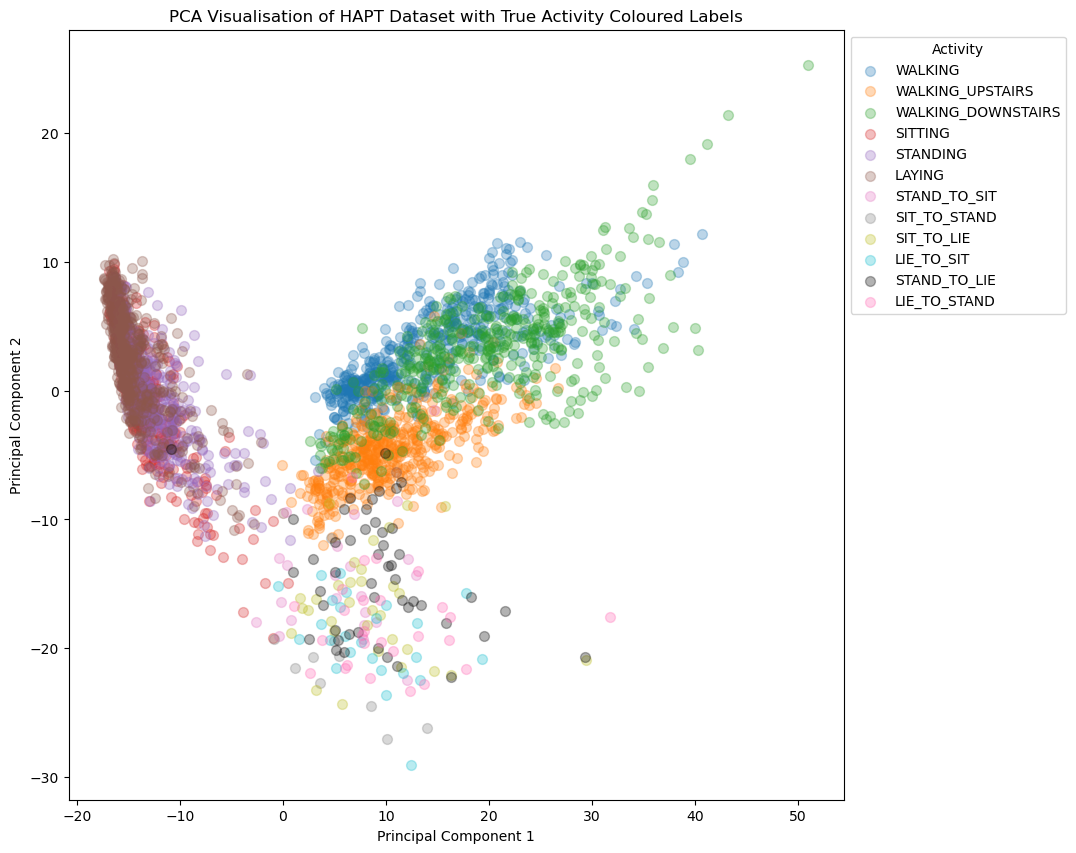

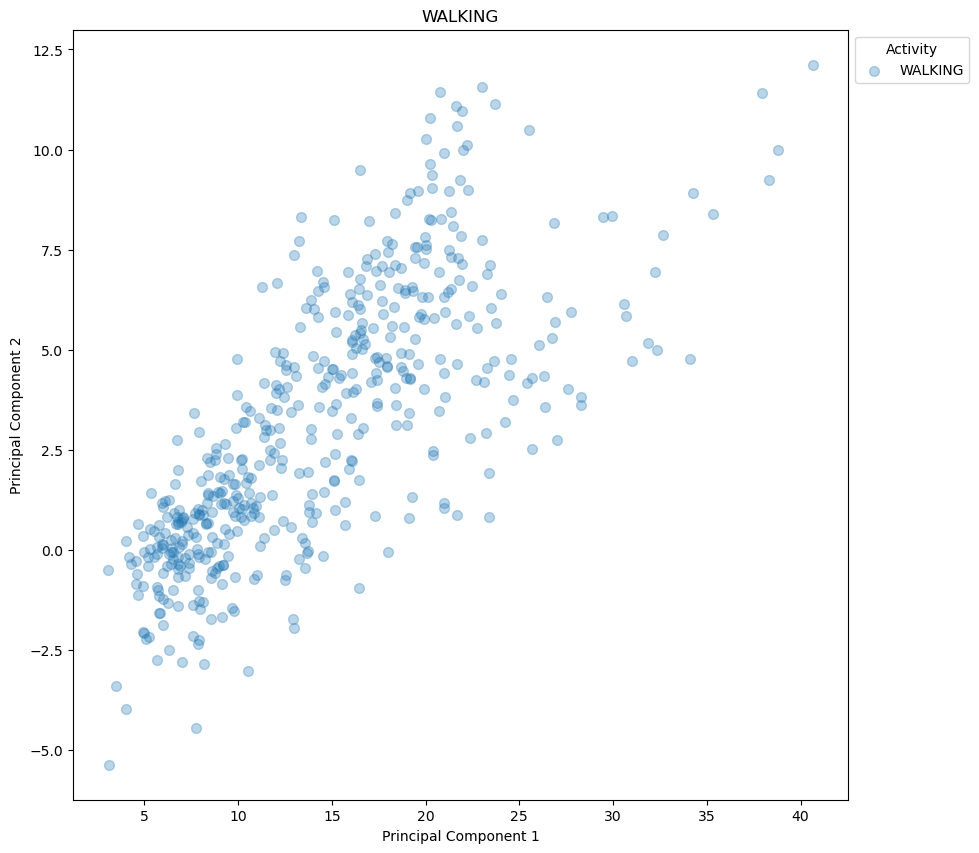

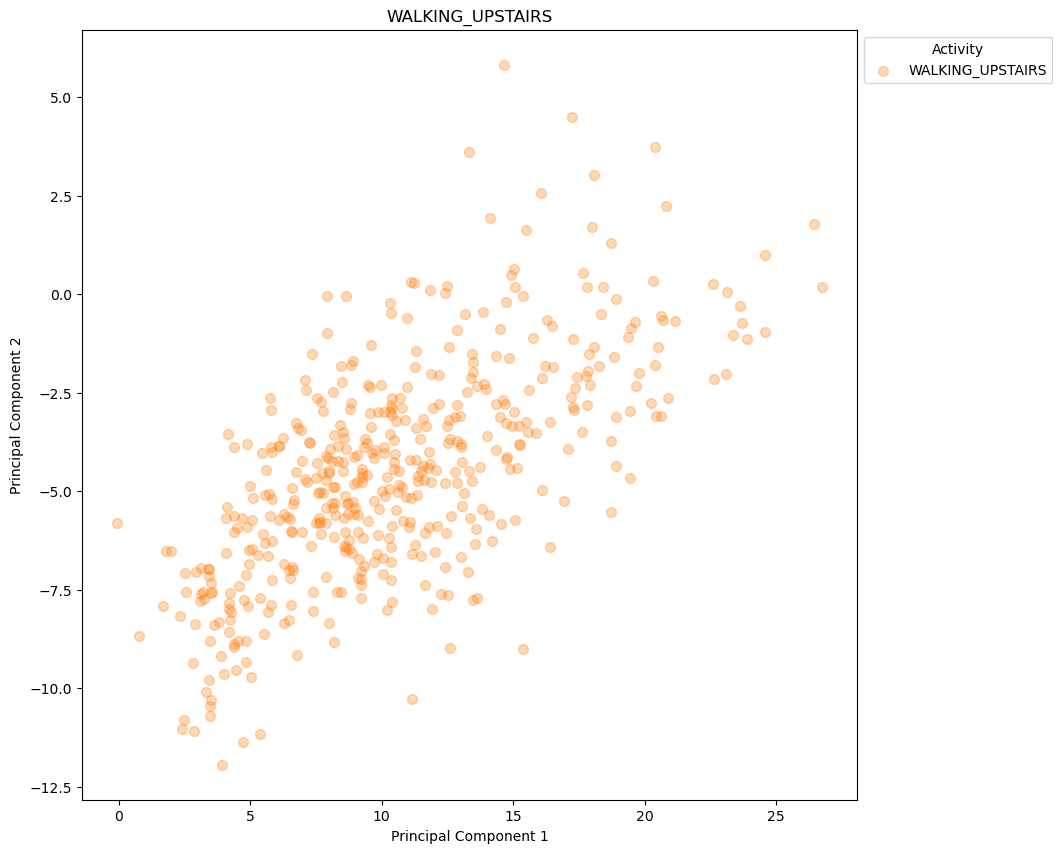

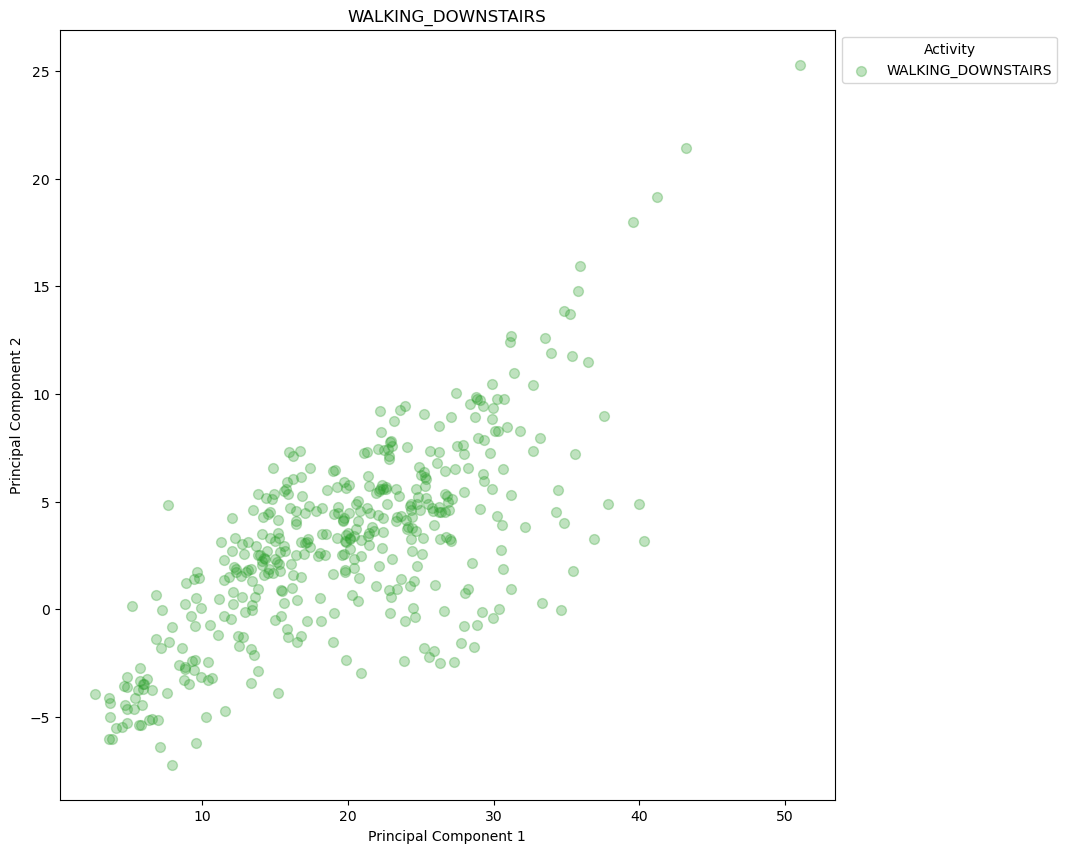

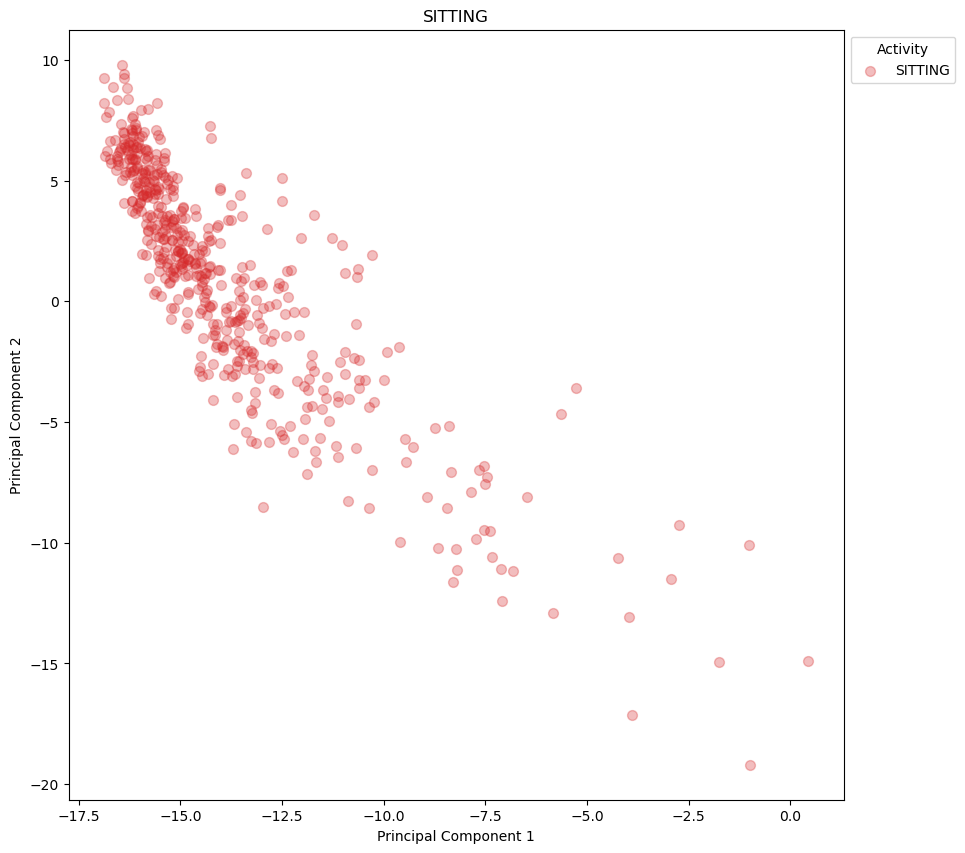

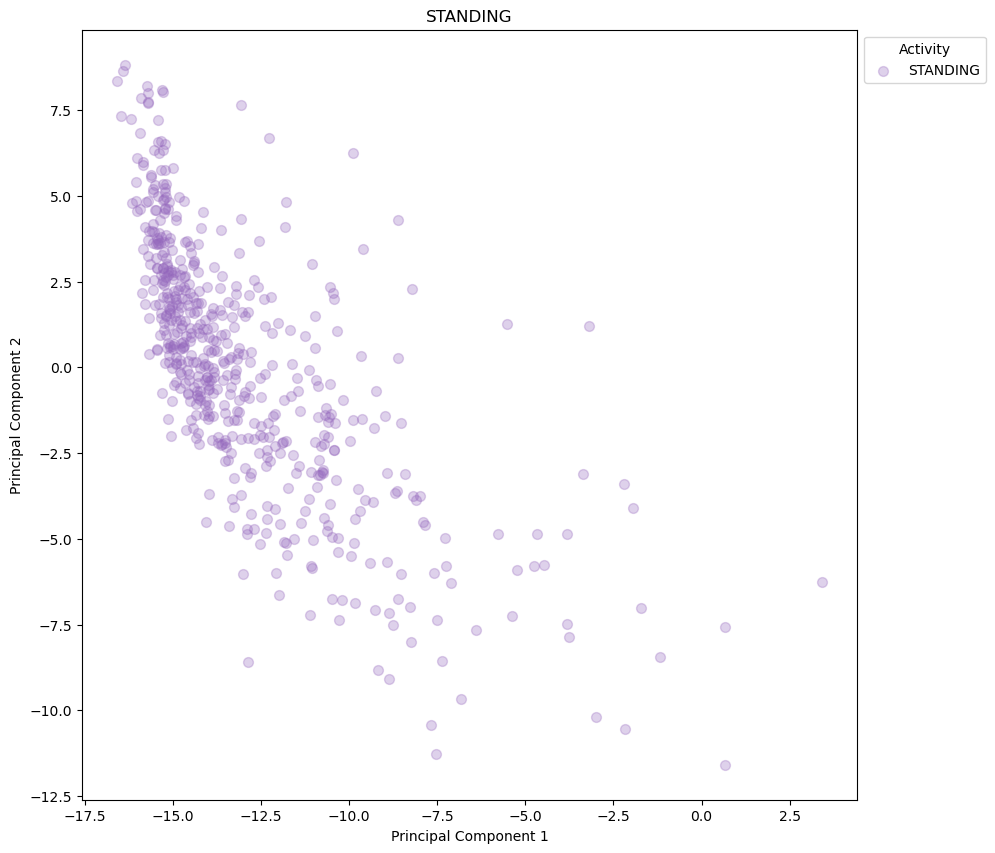

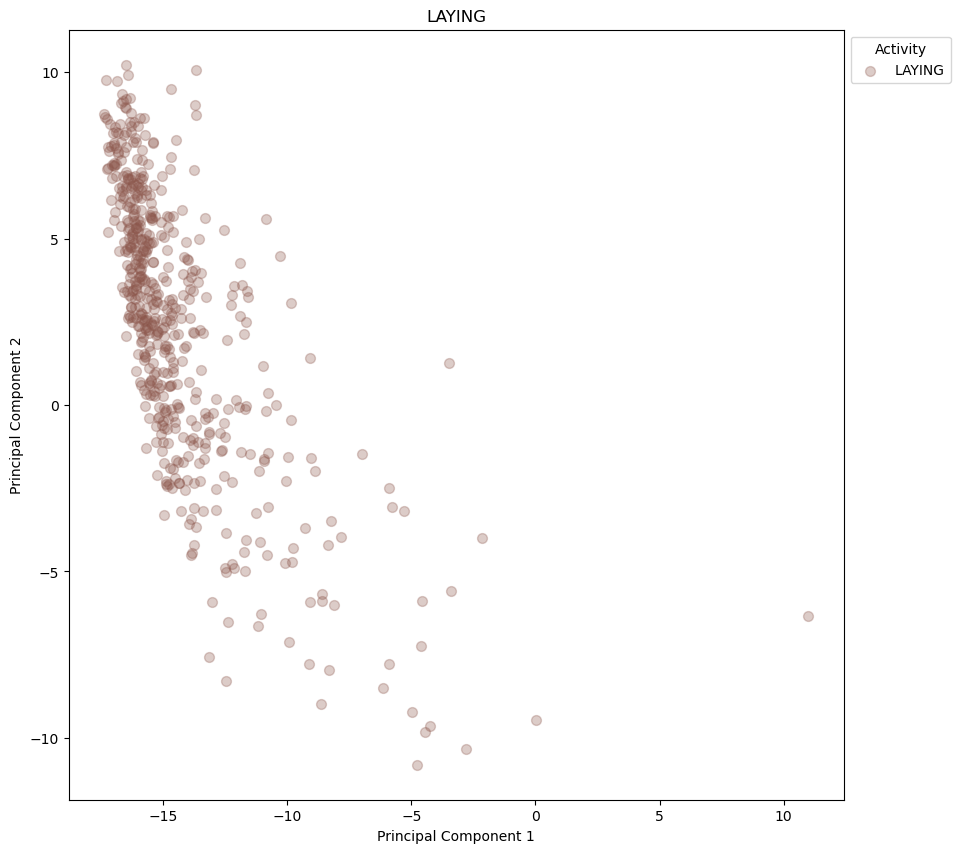

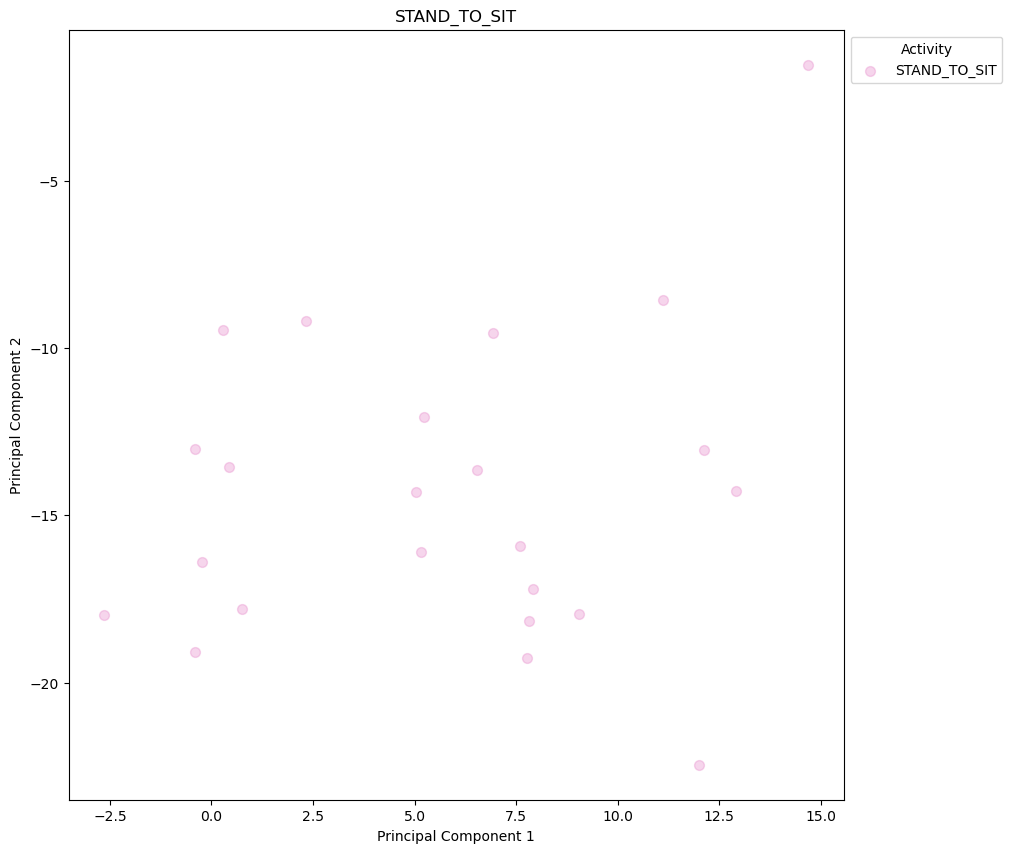

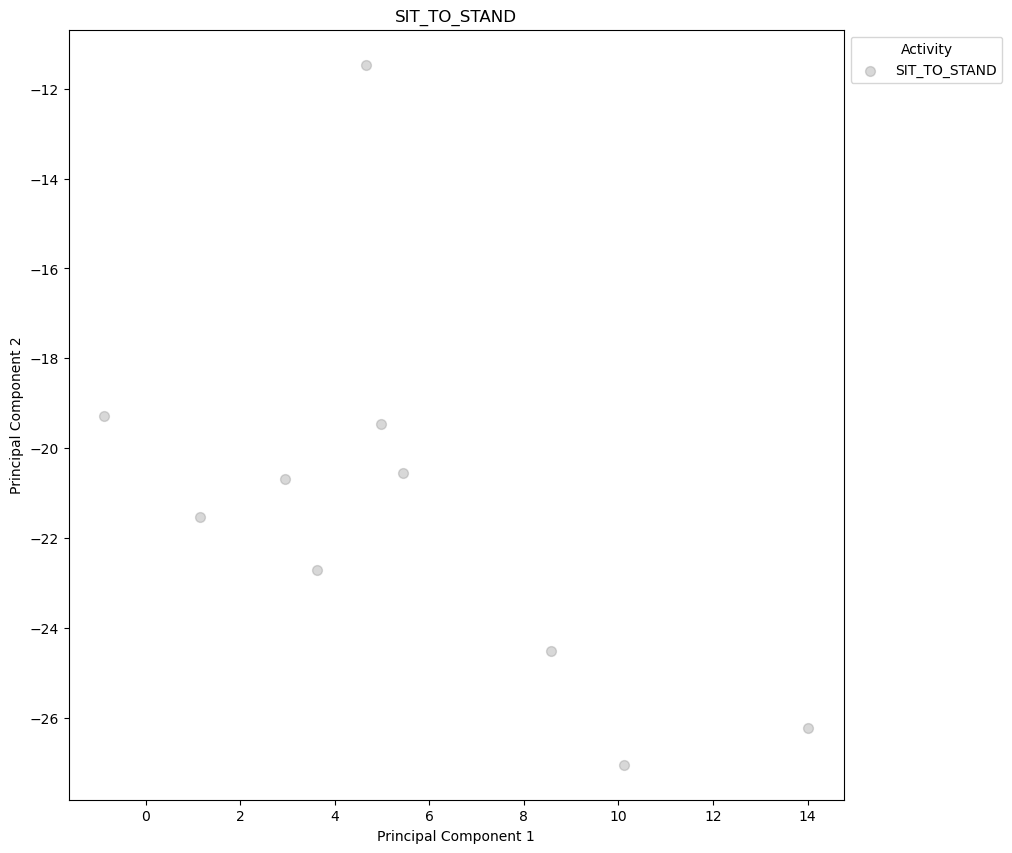

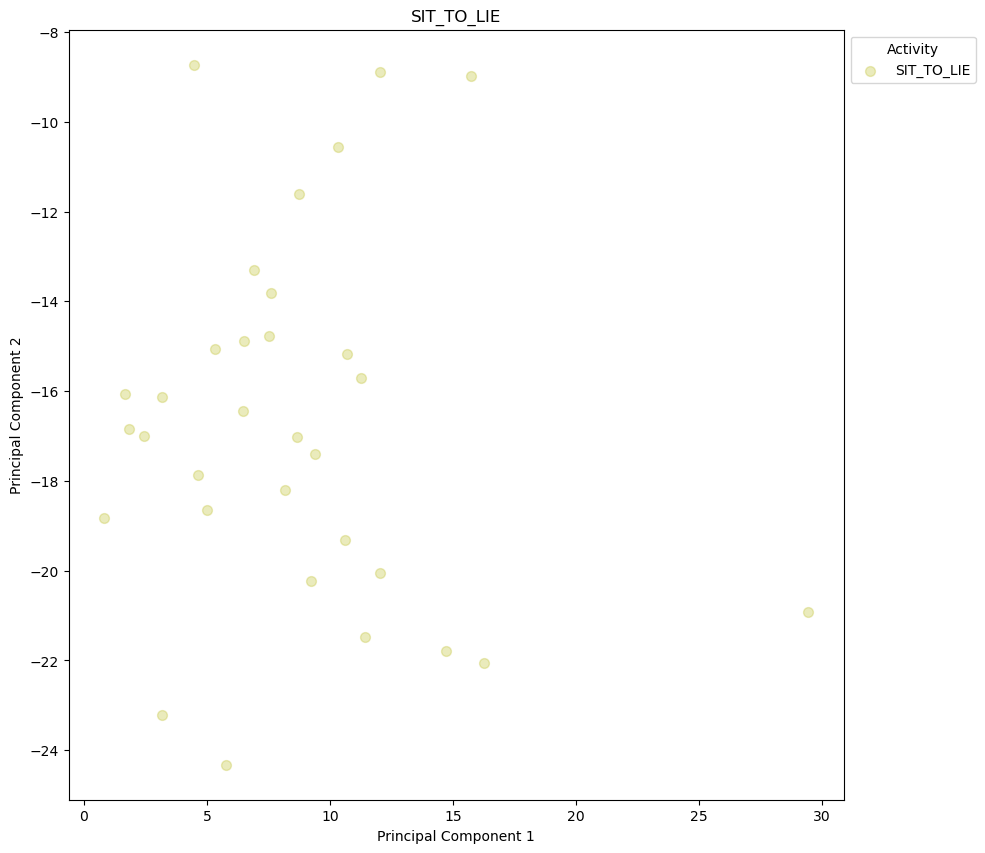

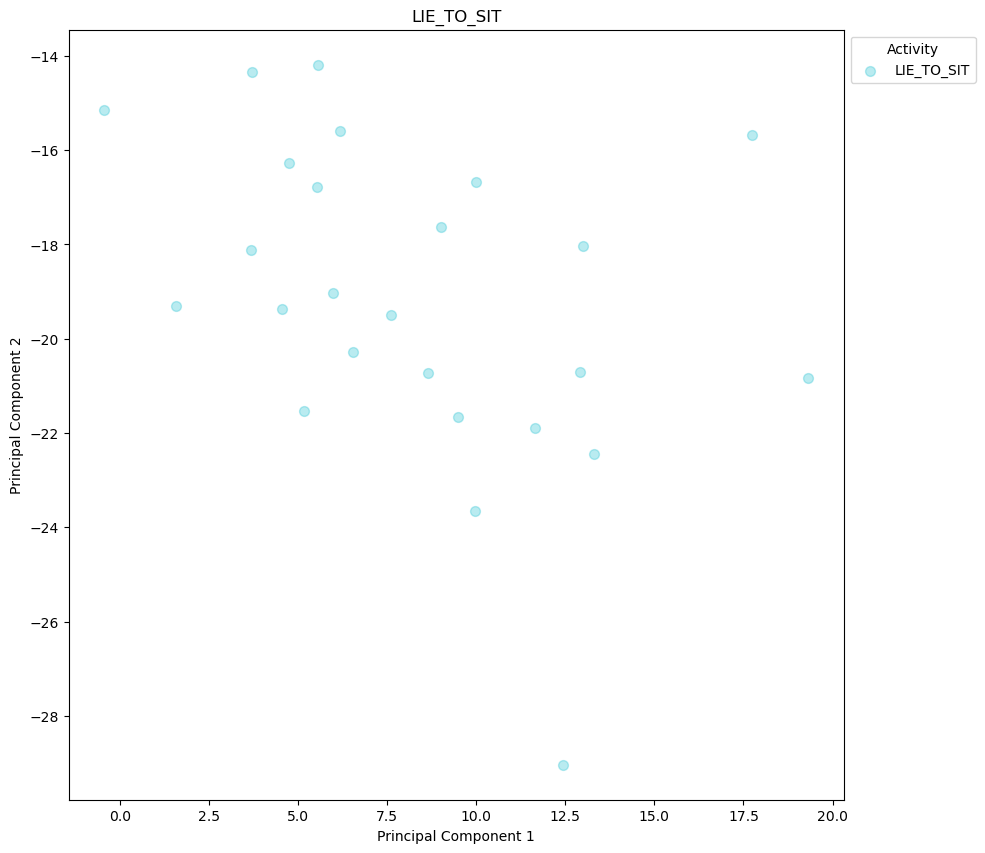

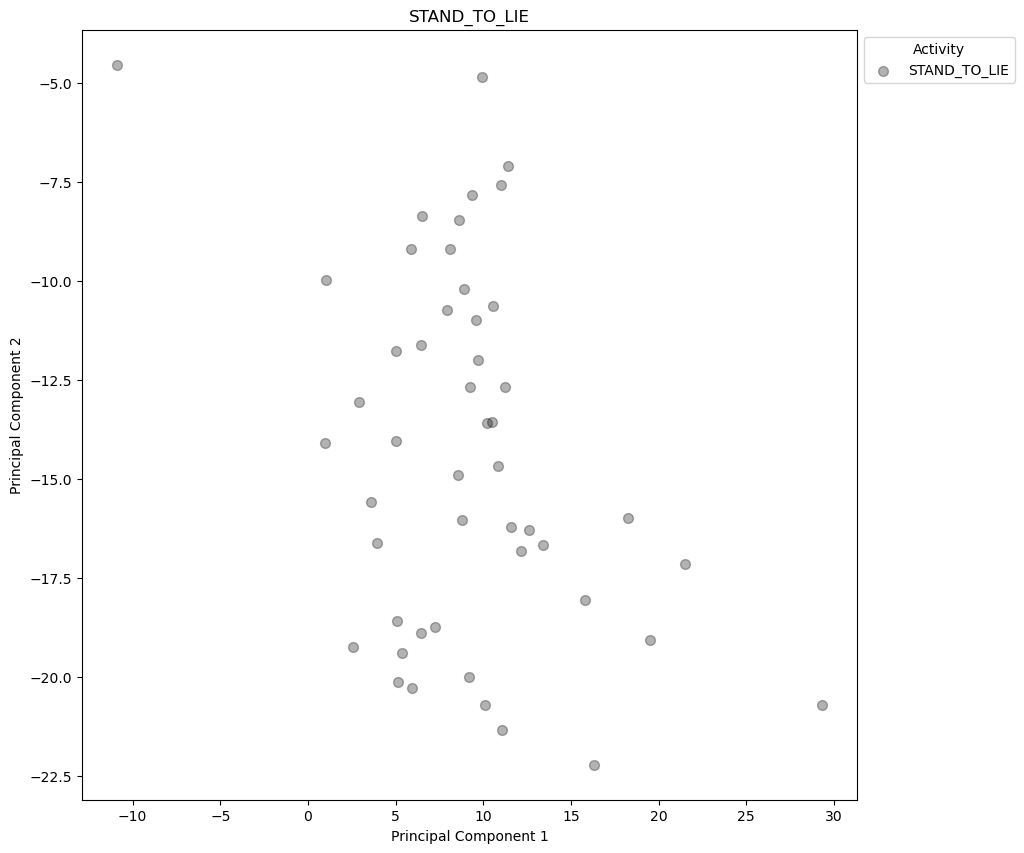

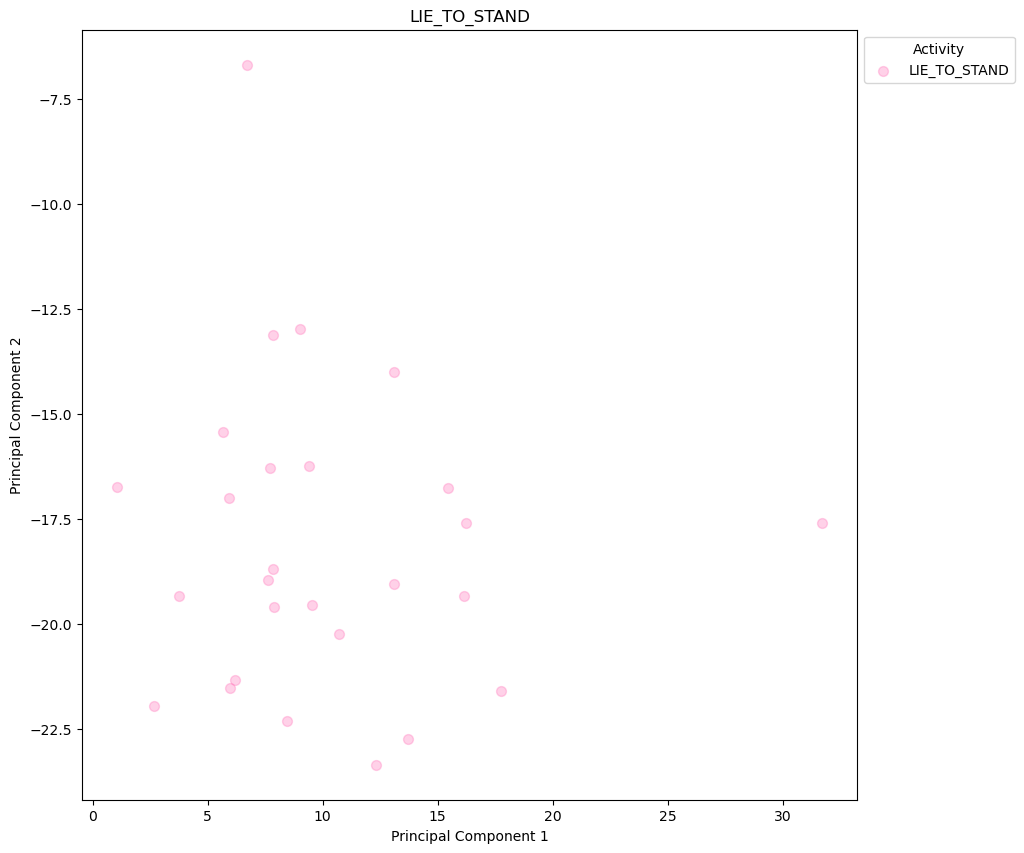

In [7]:
# Imports required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Defines a function for filtering data
def filter_data(data):
    # Your filtering operations go here
    filtered_data = data
    return filtered_data

# Load the training and testing data
X_train = pd.read_csv('E:/HAPT/Train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('E:/HAPT/Train/y_train.txt', delim_whitespace=True, header=None)
X_test = pd.read_csv('E:/HAPT/Test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('E:/HAPT/Test/y_test.txt', delim_whitespace=True, header=None)

# Load the subject IDs and activity labels
train_subjects = pd.read_csv('E:/HAPT/Train/subject_id_train.txt', header=None)
test_subjects = pd.read_csv('E:/HAPT/Test/subject_id_test.txt', header=None)
activity_labels = pd.read_csv('E:/HAPT/activity_labels.txt', delim_whitespace=True, header=None, index_col=0).reset_index()

# Scale the training data using StandardScaler
scaler = StandardScaler()
# Scale the training data using StandardScaler
X_train_scaled = scaler.fit_transform(X_train)

# Filter the test data using the filter_data function
X_test_filtered = filter_data(X_test)

# Scale the filtered test data using the same StandardScaler object
X_test_scaled = scaler.transform(X_test_filtered)

# Apply PCA to the combined scaled training and test data
pca = PCA(n_components=2, random_state=42)
X_train_test_pca = pca.fit_transform(np.vstack((X_train_scaled, X_test_scaled)))

# Separate the transformed test data from the combined data
X_test_pca = X_train_test_pca[len(X_train_scaled):, :]

# Create a DataFrame of the transformed test data with labels and subject IDs
df = pd.DataFrame(X_test_pca, columns=['X', 'Y'])
df['true_label'] = y_test
df['subject_id'] = test_subjects

# Set the list of colors to use
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#000000', '#ff69b4']

# Create a scatter plot of the PCA embeddings for all activities
fig, ax = plt.subplots(figsize=(10, 10))
for i, row in activity_labels.iterrows():
    activity = row[0]
    activity_name = row[1]
    activity_df = df[df['true_label'] == activity]
    color = colors[i % len(colors)]  # Cycle through the colors
    ax.scatter(activity_df['X'], activity_df['Y'], c=[color], alpha=0.3, s=50, label=activity_name)

ax.set_title("PCA Visualisation of HAPT Dataset with True Activity Coloured Labels")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Activity')
# Set X and Y axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

# Create separate scatter plots of the PCA embeddings for each activity
for i, row in activity_labels.iterrows():
    activity = row[0]
    activity_name = row[1]
    activity_df = df[df['true_label'] == activity]
    # Cycle through the colors
    color = colors[i % len(colors)]  
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(activity_df['X'], activity_df['Y'], c=[color], alpha=0.3, s=50, label=activity_name)
    ax.set_title(activity_name)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Activity')
    # Set X and Y axis labels
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    plt.show()

